# Choose and Download model

In [2]:
import mmpretrain
print(mmpretrain.__version__)

from mmpretrain import get_model, list_models, inference_model

1.0.0rc8


In [6]:
list_models(task='Image Classification', pattern='mobilevit')

['mobilevit-small_3rdparty_in1k',
 'mobilevit-xsmall_3rdparty_in1k',
 'mobilevit-xxsmall_3rdparty_in1k']

In [19]:
list_models(task='Image Classification', pattern='resnet18')

['resnet18_8xb16_cifar10', 'resnet18_8xb32_in1k']

In [7]:
model = get_model('mobilevit-small_3rdparty_in1k', pretrained=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmclassification/v0/mobilevit/mobilevit-small_3rdparty_in1k_20221018-cb4f741c.pth


Downloading: "https://download.openmmlab.com/mmclassification/v0/mobilevit/mobilevit-small_3rdparty_in1k_20221018-cb4f741c.pth" to /home/elsa/.cache/torch/hub/checkpoints/mobilevit-small_3rdparty_in1k_20221018-cb4f741c.pth


In [8]:
type(model.backbone)

mmpretrain.models.backbones.mobilevit.MobileViT

# Data preparation

In [ ]:
!python data_split.py fruit30_train data

# Modify config file

In [9]:
from mmengine import Config

In [10]:
cfg = Config.fromfile("../mmpretrain/configs/mobilevit/mobilevit-small_8xb128_in1k.py")

In [17]:
print(cfg)

Config (path: ../mmpretrain/configs/mobilevit/mobilevit-small_8xb128_in1k.py): {'model': {'type': 'ImageClassifier', 'backbone': {'type': 'MobileViT', 'arch': 'small'}, 'neck': {'type': 'GlobalAveragePooling'}, 'head': {'type': 'LinearClsHead', 'num_classes': 1000, 'in_channels': 640, 'loss': {'type': 'CrossEntropyLoss', 'loss_weight': 1.0}, 'topk': (1, 5)}}, 'dataset_type': 'ImageNet', 'data_preprocessor': {'num_classes': 1000, 'mean': [0, 0, 0], 'std': [255, 255, 255], 'to_rgb': False}, 'train_pipeline': [{'type': 'LoadImageFromFile'}, {'type': 'RandomResizedCrop', 'scale': 224}, {'type': 'RandomFlip', 'prob': 0.5, 'direction': 'horizontal'}, {'type': 'PackInputs'}], 'test_pipeline': [{'type': 'LoadImageFromFile'}, {'type': 'ResizeEdge', 'scale': 288, 'edge': 'short'}, {'type': 'CenterCrop', 'crop_size': 256}, {'type': 'PackInputs'}], 'train_dataloader': {'batch_size': 128, 'num_workers': 5, 'dataset': {'type': 'ImageNet', 'data_root': 'data/imagenet', 'ann_file': 'meta/train.txt', '

In [18]:
cfg.dump('mobilevit-small_fruit30.py')

In [28]:
cfg_new = Config.fromfile('./mobilevit-small_fruit30.py')
cfg_new

Config (path: ./mobilevit-small_fruit30.py): {'learning_rate': 0.001, 'epochs': 100, 'bs': 32, 'model': {'type': 'ImageClassifier', 'backbone': {'type': 'MobileViT', 'arch': 'small'}, 'neck': {'type': 'GlobalAveragePooling'}, 'head': {'type': 'LinearClsHead', 'num_classes': 30, 'in_channels': 640, 'loss': {'type': 'CrossEntropyLoss', 'loss_weight': 1.0}, 'topk': (1,)}, 'init_cfg': {'type': 'Pretrained', 'checkpoint': '../hw2/checkpoint/mobilevit-small_3rdparty_in1k_20221018-cb4f741c.pth'}}, 'dataset_type': 'CustomDataset', 'data_preprocessor': {'num_classes': 30, 'mean': [123.675, 116.28, 103.53], 'std': [58.395, 57.12, 57.375], 'to_rgb': True}, 'train_pipeline': [{'type': 'LoadImageFromFile'}, {'type': 'RandomResizedCrop', 'scale': 224}, {'type': 'RandomFlip', 'prob': 0.5, 'direction': 'horizontal'}, {'type': 'PackInputs'}], 'test_pipeline': [{'type': 'LoadImageFromFile'}, {'type': 'ResizeEdge', 'scale': 256, 'edge': 'short'}, {'type': 'CenterCrop', 'crop_size': 224}, {'type': 'PackIn

# Result

In [30]:
import os

In [32]:
os.chdir("../mmpretrain")
%pwd

'/home/elsa/Workspace/OpenMMLab/mmpretrain'

In [ ]:
!python ../mmpretrain/tools/train.py mobilevit-small_fruit30.py 

In [37]:
from PIL import Image, ImageFont, ImageDraw
os.chdir('../hw2')
%pwd

'/home/elsa/Workspace/OpenMMLab/hw2'

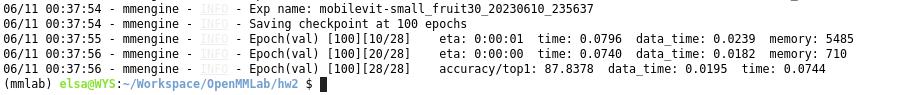

In [38]:
Image.open('result_img/train_result.png')

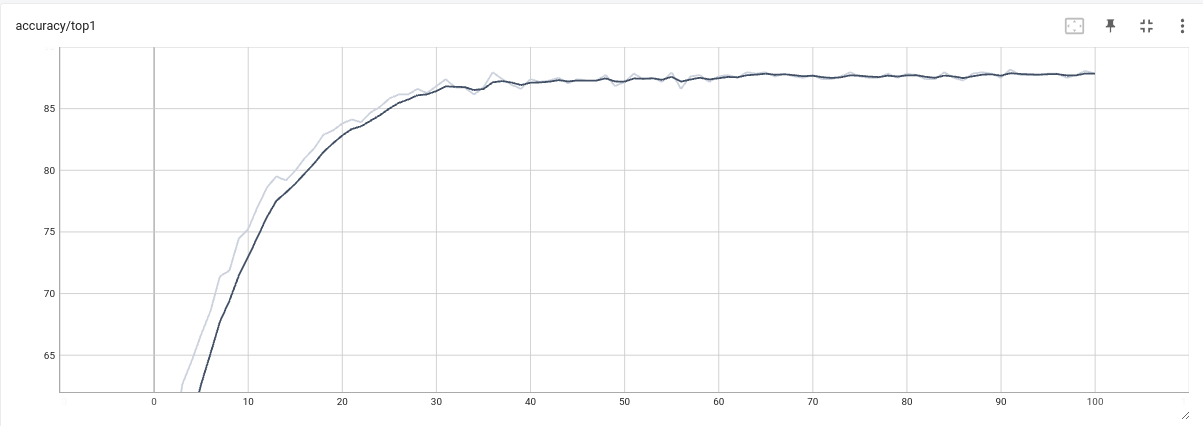

In [39]:
Image.open('result_img/accuracy.png')

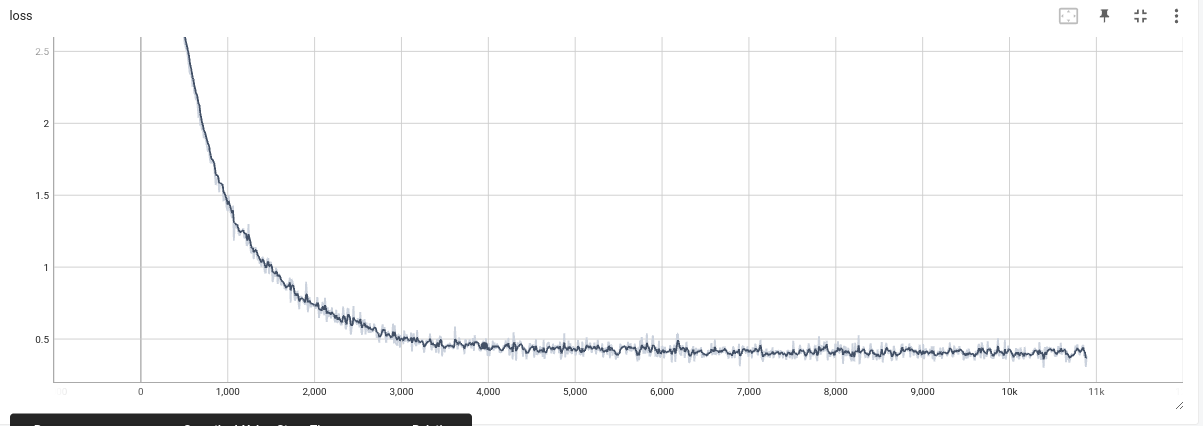

In [40]:
Image.open('result_img/loss.png')

# Test with image

In [71]:
dataset = 'data/train'
idx_to_labels = sorted(os.listdir(dataset))
idx_to_labels

['哈密瓜',
 '圣女果',
 '山竹',
 '杨梅',
 '柚子',
 '柠檬',
 '桂圆',
 '梨',
 '椰子',
 '榴莲',
 '火龙果',
 '猕猴桃',
 '石榴',
 '砂糖橘',
 '胡萝卜',
 '脐橙',
 '芒果',
 '苦瓜',
 '苹果-红',
 '苹果-青',
 '草莓',
 '荔枝',
 '菠萝',
 '葡萄-白',
 '葡萄-红',
 '西瓜',
 '西红柿',
 '车厘子',
 '香蕉',
 '黄瓜']

In [43]:
from mmpretrain import ImageClassificationInferencer

In [72]:
infer = ImageClassificationInferencer(
    model='mobilevit-small_fruit30.py',
    pretrained='work_dirs/mobilevit-small_fruit30/best_accuracy_top1_epoch_91.pth',
    device='cuda',
    classes=idx_to_labels
)

Loads checkpoint by local backend from path: work_dirs/mobilevit-small_fruit30/best_accuracy_top1_epoch_91.pth

In [73]:
test_img = 'data/train/圣女果/115.jpeg'

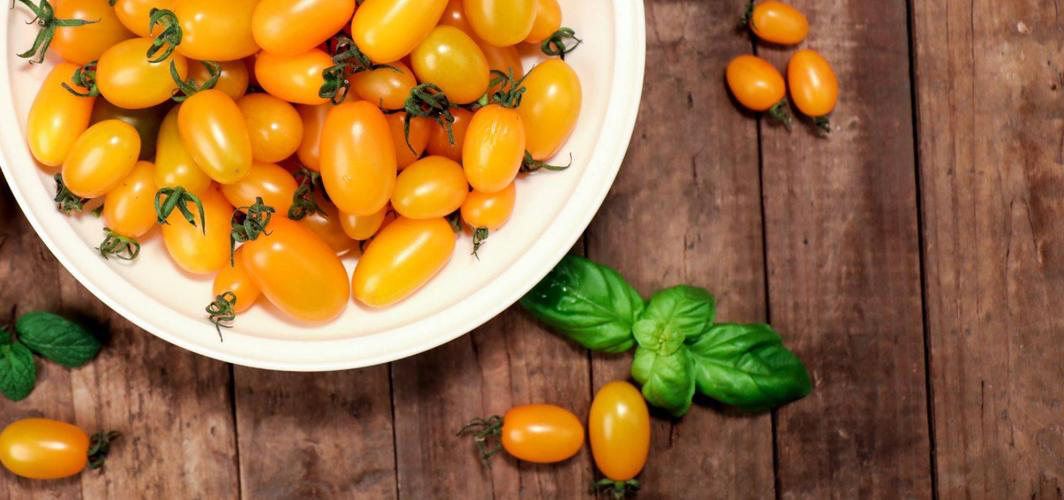

In [74]:
Image.open(test_img)

In [75]:
infer(test_img)

[{'pred_scores': array([3.6420522e-04, 8.0157250e-01, 3.5406012e-04, 5.8493903e-04,
         1.1274279e-04, 2.0445059e-03, 7.3807809e-04, 3.0334762e-04,
         2.9956861e-04, 7.8787172e-04, 6.5575197e-04, 1.1877164e-03,
         9.9013234e-04, 1.1931476e-02, 1.8458154e-02, 9.4809663e-03,
         2.4333696e-03, 1.2875141e-02, 2.4154429e-04, 2.9301853e-03,
         3.4831292e-03, 2.4276201e-04, 5.5912421e-03, 2.4602696e-02,
         4.1431044e-03, 4.5320753e-04, 8.3185039e-02, 2.2426245e-03,
         5.1437984e-03, 2.5660996e-03], dtype=float32),
  'pred_label': 1,
  'pred_score': 0.8015725016593933,
  'pred_class': '圣女果'}]